## Attempt to design a new evaluation result plot to present the performance of PbPI algorithm

#### Background:

As of now, we measure and demonstrate the performance of PbPI algorithm following the work of XXX. Both XXX and YYY have recorded the performance of the algorithms that they developed using the below chart: 

<center><img src="graphics/current_chart.png"></center>

The only information this chart present is that whether the algorithm was able to find a sufficient policy in at least one of the policy iteration runs completed during the experiment.

In this notebook, we will try to explore different methods to present additional performance information by designing a new evaluation  plot.

----

We will use the evaluation results that we produced by running 510 experiments ([stored here](https://github.com/PandulaP/RL_Research/tree/main/Pb_policy_iteration/cart_pole_modified_env/reproduce_FHCP_results/original_algo/eval_results)) with the *original* PbPI algorithm for the experiments.

In [1]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def process_eval_file(file_name:str):
    """
    Opens excel files that contains the evaluation results of each exeperiment
    and process the data to readable format.
    """
    
    try:
        eva_results = pd.read_excel(f'{file_name}.xlsx')
    except:
        return None
    
    eva_results.loc[:,'SR_processed'] = eva_results.apply(lambda row: row.SR.replace('[',''), axis=1)
    eva_results.loc[:,'SR_processed'] = eva_results.apply(lambda row: row.SR_processed.replace(']',''), axis=1)
    eva_results.loc[:,'SR_processed'] = eva_results.apply(lambda row: row.SR_processed.split(','), axis=1)

    eva_results.loc[:,'action_record_processed'] = eva_results.apply(lambda row: row.action_record.replace('[',''), axis=1)
    eva_results.loc[:,'action_record_processed'] = eva_results.apply(lambda row: row.action_record_processed.replace(']',''), axis=1)
    eva_results.loc[:,'action_record_processed'] = eva_results.apply(lambda row: row.action_record_processed.split(','), axis=1)

    return eva_results

In [5]:
# Open the evaluation result files and create a single file with all results
eval_f_list = []

for i in range(11):
    #print(i)
    name_prefix = '../reproduce_FHCP_results/original_algo/eval_results/original_experiment_results_para_config_'
    f_num = i+1
    f_name = name_prefix + str(f_num)
    
    if process_eval_file(f_name) is not None:
        eval_f_list.append(process_eval_file(f_name))

eval_results = pd.concat(eval_f_list)

# Convert the values in the lists to foats
eval_results.loc[:,'SR_processed'] = eval_results.SR_processed.apply(lambda list: np.array([float(x) for x in list]))
eval_results.loc[:,'action_record_processed'] = eval_results.action_record_processed.apply(lambda list: np.array([float(x) for x in list]))

# Store the file
eval_results.to_csv('data/eval_results.csv', index=False)

eval_results.head()

,S,Actions,Roll-outs,Significance,run,action_record,SR,SR_processed,action_record_processed
0,10,3,10,0.025,0,"[4237, 48618, 63877, 75558, 80113, 84486, 8898...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4237.0, 48618.0, 63877.0, 75558.0, 80113.0, 8..."
1,10,3,10,0.025,1,"[4321, 24800, 36477, 57970, 72215, 76991, 1091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4321.0, 24800.0, 36477.0, 57970.0, 72215.0, 7..."
2,10,3,10,0.025,2,"[4385, 22015, 25889, 37739, 41729, 49721, 6551...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4385.0, 22015.0, 25889.0, 37739.0, 41729.0, 4..."
3,10,3,10,0.025,3,"[4251, 26319, 41077, 45378, 105031, 116689, 12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4251.0, 26319.0, 41077.0, 45378.0, 105031.0, ..."
4,10,3,10,0.025,4,"[4312, 33165, 37530, 49567, 53510, 63649, 6761...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4312.0, 33165.0, 37530.0, 49567.0, 53510.0, 6..."


In [6]:
tot_exp_count = eval_results.shape[0]
tot_succ_exp_count = eval_results.loc[eval_results.SR_processed.apply(lambda list: list.max())>0].shape[0]

print(f"There are {tot_exp_count} number of experiments. From them, only {tot_succ_exp_count} experiments have found a sufficient policy.")

There are 510 number of experiments. From them, only 251 experiments have found a sufficient policy.


In [7]:
# Create a single column having (sr,action) pair lists for each experiment
eval_results.loc[:,'sr_action_pairs'] = eval_results.apply(lambda row: [(sr,action) for sr in row.SR_processed for action in row.action_record_processed],axis=1)

In [8]:
# Create a single list having all (sr,action) pairs
sr_action_pairs_list = np.array([pair for pairs in eval_results.sr_action_pairs.values for pair in pairs])
print(f"There are {len(sr_action_pairs_list):,} number of state-action pairs from the evaluation results.")

There are 56,925 number of state-action pairs from the evaluation results.


In [9]:
# Create a pandas dataframe with the sr-action pairs
sr_action_pairs_df = pd.DataFrame(sr_action_pairs_list, columns=['SR','actions'])

# Sort the dataframe with 'actions'
sr_action_pairs_df.sort_values('actions',inplace=True)

sr_action_pairs_df.head(10)

,SR,actions
2901,0.0,3864.0
2845,0.0,3864.0
2859,0.0,3864.0
2803,0.0,3864.0
2873,0.0,3864.0
2887,0.0,3864.0
2789,0.0,3864.0
2831,0.0,3864.0
2817,0.0,3864.0
2761,0.0,3864.0


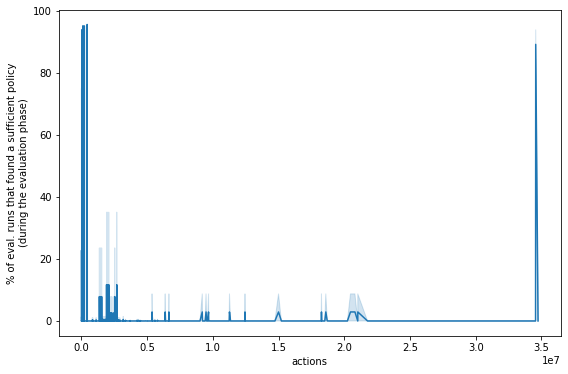

In [10]:
plt.figure(figsize=(9,6))
sns.lineplot(x = 'actions'
            , y = 'SR'
            , data =  sr_action_pairs_df)
plt.ylabel("% of eval. runs that found a sufficient policy\n(during the evaluation phase)")
plt.show()

- Above plot doesn't make sense.
- We know that the number of initial states directly influence the performance of the algorithm.
- Therefore, it makes more sense to analyse the 'SR' vs 'Action' performances of the experiments having the same (number of) initial states

#### Working with a set of experiments with a fixed number of initial states

- Let's pick the experiments that has 50 initial states.
- I do this because, in a separate analysis I showed that experiments with high number of initial states are likely to find sufficient policies.

In [183]:
eval_results_50_states = eval_results.loc[eval_results.S == 50]
eval_results_50_states.head()

,S,Actions,Roll-outs,Significance,run,action_record,SR,SR_processed,action_record_processed
0,50,3,10,0.025,0,[21194],[0.32],[0.32],[21194.0]
1,50,3,10,0.025,1,"[21165, 993101, 1024070, 1075536, 1127796, 136...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[21165.0, 993101.0, 1024070.0, 1075536.0, 1127..."
2,50,3,10,0.025,2,[21092],[15.42],[15.42],[21092.0]
3,50,3,10,0.025,3,"[20918, 441835, 486369, 1615048, 1662918, 1814...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[20918.0, 441835.0, 486369.0, 1615048.0, 16629..."
4,50,3,10,0.025,4,[20936],[75.03999999999999],[75.03999999999999],[20936.0]


- As before, let's process this dataset and create a single dataset having 'sr-action' pairs

In [184]:
eval_results_50_states.loc[:,'sr_action_pairs'] = eval_results_50_states. \
                                                  apply(lambda row: [(sr,action) for sr in row.SR_processed for action in row.action_record_processed],axis=1)

sr_action_pairs_list_50_states = np.array([pair for pairs in eval_results_50_states.sr_action_pairs.values for pair in pairs])

# Create a pandas dataframe with the sr-action pairs
sr_action_pairs_50_states_df = pd.DataFrame(sr_action_pairs_list_50_states, columns=['SR','actions'])

# Sort the dataframe with 'actions'
sr_action_pairs_50_states_df.sort_values('actions',inplace=True)

sr_action_pairs_50_states_df.head(10)

,SR,actions
620,0.0,20805.0
430,0.0,20805.0
335,0.0,20805.0
297,0.0,20805.0
639,0.0,20805.0
373,0.0,20805.0
392,0.0,20805.0
601,0.0,20805.0
354,0.0,20805.0
449,0.0,20805.0


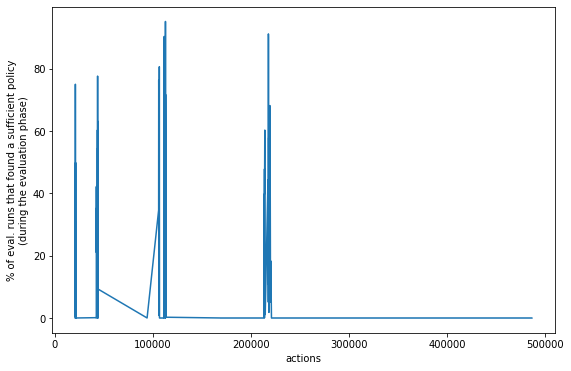

In [185]:
plt.figure(figsize=(9,6))
sns.lineplot(x = 'actions'
            , y = 'SR'
            , data =  sr_action_pairs_50_states_df[sr_action_pairs_50_states_df.actions<500000])
plt.ylabel("% of eval. runs that found a sufficient policy\n(during the evaluation phase)")
plt.show()

- This also doesn't look useful :(

---
### Work-in-Progress

OKAY - NEW APPROACH:
- FIND THE EXPERIMENT RUNS THAT FIND A SUCCESSFUL POLICY.
- ARRANGE THEM ACCORDING TO THE # ACTIONS (AS BEFORE)
- BUCKET THE # ACTIONS INTO CERTAIN STEPS
- AT EACH STEP, COMPUTE THE AVG, MIN, MAX, MEDIAN SR VALUES REACHED BY EACH EXPERIMENT.
- PLOT THE

#### Original-algorithm performance

In [28]:
eval_results_50_states.shape

(120, 10)

In [11]:
# Prepare 50 init. state dataset

eval_results_50_states = eval_results.loc[eval_results.S == 50]

eval_results_50_states.loc[:,'sr_action_pairs'] = eval_results_50_states. \
                                                  apply(lambda row: [(sr,action) for sr in row.SR_processed for action in row.action_record_processed],axis=1)

sr_action_pairs_list_50_states = np.array([pair for pairs in eval_results_50_states.sr_action_pairs.values for pair in pairs])

# Create a pandas dataframe with the sr-action pairs
sr_action_pairs_50_states_df = pd.DataFrame(sr_action_pairs_list_50_states, columns=['SR','actions'])

# Sort the dataframe with 'actions'
sr_action_pairs_50_states_df.sort_values('actions',inplace=True)

sr_action_pairs_50_states_df.head()


,SR,actions
620,0.0,20805.0
430,0.0,20805.0
335,0.0,20805.0
297,0.0,20805.0
639,0.0,20805.0


In [12]:
# Compute bins for the 'actions'
# Here, I use the percentile values of the existing 'action' values 
#  to define the lower and upper limits of the bins

# bins computed for full dataset
bins_full = []

for val in np.arange(0,1.1,0.1):
    if val == 1:
        bins_full.append(int(sr_action_pairs_50_states_df.actions.quantile(val)+1))
    else:
        bins_full.append(int(sr_action_pairs_50_states_df.actions.quantile(val)-1))


# bins computed for reduced dataset 
# (only include successful SR-action pairs)
bins_reduced = []

for val in np.arange(0,1.1,0.1):
    if val == 1:
        bins_reduced.append(int(sr_action_pairs_50_states_df.loc[sr_action_pairs_50_states_df.SR>0,:].actions.quantile(val)+1))
    else:
        bins_reduced.append(int(sr_action_pairs_50_states_df.loc[sr_action_pairs_50_states_df.SR>0,:].actions.quantile(val)-1))

In [13]:
# Create a new column with the bins
sr_action_pairs_50_states_df.loc[:,'action_bins_full'] = pd.cut(sr_action_pairs_50_states_df.actions, bins_full)
sr_action_pairs_50_states_df.loc[:,'action_bins_reduced'] = pd.cut(sr_action_pairs_50_states_df.actions, bins_reduced)

# Compute a new column with the ceiling value of the bins
sr_action_pairs_50_states_df.loc[:,'action_num_ceiling_full'] = sr_action_pairs_50_states_df.action_bins_full.apply(lambda interval: interval.right)
sr_action_pairs_50_states_df.loc[:,'action_num_ceiling_reduced'] = sr_action_pairs_50_states_df.action_bins_reduced.apply(lambda interval: interval.right)

sr_action_pairs_50_states_df.head(10)

,SR,actions,action_bins_full,action_bins_reduced,action_num_ceiling_full,action_num_ceiling_reduced
620,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
430,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
335,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
297,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
639,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
373,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
392,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
601,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
354,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN
449,0.0,20805.0,"(20804, 220089]",NaN,220089,NaN


In [14]:
# Compute summary stats on the full dataset (including unsuccessful 'sr-action' pairs)
summary_1 = sr_action_pairs_50_states_df.groupby('action_num_ceiling_full').SR.agg({'num_records': 'count'
                                                                                    , 'avg_sr': 'mean'
                                                                                    , 'meadian_sr': 'median'
                                                                                    , 'std_sr': 'std'
                                                                                    , 'first_qtile' : lambda x : np.quantile(x, q=0.25)
                                                                                    , 'third_qtile' : lambda x : np.quantile(x, q=0.75)}
                                                                                    )

summary_1

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_full,,,,,,
220089,472,5.780466,0.0,16.995104,0.0,0.0
755161,471,0.062378,0.0,0.984803,0.0,0.0
1058988,460,0.000609,0.0,0.004902,0.0,0.0
1611826,473,0.260677,0.0,3.130628,0.0,0.0
1974887,469,0.046226,0.0,0.498938,0.0,0.0
2378620,472,0.128559,0.0,1.144269,0.0,0.0
3095208,468,0.118718,0.0,1.913942,0.0,0.0
5434368,476,0.025168,0.0,0.289585,0.0,0.0
10861209,479,0.006848,0.0,0.105861,0.0,0.0


In [15]:
# Compute summary stats on the reduced dataset (excluding unsuccessful 'sr-action' pairs)
summary_2 = sr_action_pairs_50_states_df.loc[sr_action_pairs_50_states_df.SR>0,:].groupby('action_num_ceiling_reduced').SR.agg({'num_records': 'count'
                                                                                                                        , 'avg_sr': 'mean'
                                                                                                                        , 'meadian_sr': 'median'
                                                                                                                        , 'std_sr': 'std'
                                                                                                                        , 'first_qtile' : lambda x : np.quantile(x, q=0.25)
                                                                                                                        , 'third_qtile' : lambda x : np.quantile(x, q=0.75)}
                                                                                                                        )

summary_2

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_reduced,,,,,,
21361,14,15.054286,0.94,23.710556,0.355,26.985
43485,13,20.883077,21.02,21.265991,0.140,39.280
43795,13,21.475385,9.64,26.480231,1.640,24.520
111290,13,33.070769,34.64,27.343045,9.320,41.440
112792,13,22.547692,8.38,28.287845,3.460,29.320
217396,14,36.152857,39.80,28.920401,7.230,47.690
219490,13,44.232308,44.70,33.300549,10.720,68.200
1098188,13,14.801538,0.04,22.582866,0.040,18.300
2228691,13,13.403077,5.42,14.992820,5.420,13.000


#### Modified-algorithm performance

In [16]:
# To-Do

# Follow the above process for the same set of experiments
# Generate the two summary graphs
# Think if by comparing these stats, we can prove 'modified' algorithm works better

# IDEA: compute above statistics for the same 'action_num_ceiling' values
#       because then it will be easy to compare the numbers to evaluate
#       the 'original' vs 'modified' algo. performances


# 540 experiments for the Modified algorithm are yet to be run.
# For the moment, I am going to use data from a previous experiment to
#   arrange and structure the code. 

# Open the evaluation result files and create a single file with all results
eval_f_list_2 = []

for i in range(11):
    name_prefix = '../reproduce_FHCP_results/modified_algo/eval_results/modified_experiment_results_para_config_'
    f_num = i+1
    f_name = name_prefix + str(f_num)
    
    if process_eval_file(f_name) is not None:
        eval_f_list_2.append(process_eval_file(f_name))

eval_results_2 = pd.concat(eval_f_list_2)

# Convert the values in the lists to foats
eval_results_2.loc[:,'SR_processed'] = eval_results_2.SR_processed.apply(lambda list: np.array([float(x) for x in list]))
eval_results_2.loc[:,'action_record_processed'] = eval_results_2.action_record_processed.apply(lambda list: np.array([float(x) for x in list]))

# Store the file
eval_results_2.to_csv('data/eval_results_2.csv', index=False)

eval_results_2.head()

,S,Actions,Roll-outs,Significance,run,action_record,SR,SR_processed,action_record_processed
0,10,3,10,0.025,0,"[4391, 11167, 19118, 26065, 33463, 40527, 4786...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4391.0, 11167.0, 19118.0, 26065.0, 33463.0, 4..."
1,10,3,10,0.025,1,"[4352, 9945, 17235, 23972, 32181, 39958, 47534...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4352.0, 9945.0, 17235.0, 23972.0, 32181.0, 39..."
2,10,3,10,0.025,2,"[4355, 10709, 18024, 23357, 31020, 37738, 4541...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4355.0, 10709.0, 18024.0, 23357.0, 31020.0, 3..."
3,10,3,10,0.025,3,"[4405, 10838, 16624, 24908, 33623, 40833, 4888...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4405.0, 10838.0, 16624.0, 24908.0, 33623.0, 4..."
4,10,3,10,0.025,4,"[4398, 10320, 17324, 25033, 33565, 39525, 4580...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4398.0, 10320.0, 17324.0, 25033.0, 33565.0, 3..."


In [30]:
# Prepare 50 init. state dataset

eval_results_50_states_mod = eval_results_2.loc[eval_results_2.S == 50]

eval_results_50_states_mod.loc[:,'sr_action_pairs'] = eval_results_50_states_mod \
                                                      .apply(lambda row: [(sr,action) for sr in row.SR_processed for action in row.action_record_processed],axis=1)

sr_action_pairs_list_50_states_mod = np.array([pair for pairs in eval_results_50_states_mod.sr_action_pairs.values for pair in pairs])

# Create a pandas dataframe with the sr-action pairs
sr_action_pairs_50_states_mod_df = pd.DataFrame(sr_action_pairs_list_50_states_mod, columns=['SR','actions'])

# Sort the dataframe with 'actions'
sr_action_pairs_50_states_mod_df.sort_values('actions',inplace=True)

sr_action_pairs_50_states_mod_df.head()


,SR,actions
729,0.00,20557.0
734,0.02,20557.0
719,0.00,20557.0
714,0.00,20557.0
724,0.00,20557.0


In [31]:
def generate_action_ceiling_full(cell):
    
    for action_ceil in list(sr_action_pairs_50_states_df.action_num_ceiling_full.unique())[::]:

        if cell < action_ceil:
            return int(action_ceil)
            break


def generate_action_ceiling_reduced(cell):
    
    for action_ceil in list(sr_action_pairs_50_states_df.action_num_ceiling_reduced.unique())[::]:

        if cell < action_ceil:
            return int(action_ceil)
            break

In [32]:
sr_action_pairs_50_states_mod_df.loc[:,'action_num_ceiling_full'] = sr_action_pairs_50_states_mod_df.actions.apply(generate_action_ceiling_full)
sr_action_pairs_50_states_mod_df.loc[:,'action_num_ceiling_reduced'] = sr_action_pairs_50_states_mod_df.actions.apply(generate_action_ceiling_reduced)

In [33]:
sr_action_pairs_50_states_mod_df.head()

,SR,actions,action_num_ceiling_full,action_num_ceiling_reduced
729,0.00,20557.0,220089,21361
734,0.02,20557.0,220089,21361
719,0.00,20557.0,220089,21361
714,0.00,20557.0,220089,21361
724,0.00,20557.0,220089,21361


In [34]:
# Compute summary stats on the full dataset (including unsuccessful 'sr-action' pairs)
summary_1_m = sr_action_pairs_50_states_mod_df.groupby('action_num_ceiling_full').SR.agg({'num_records': 'count'
                                                                                    , 'avg_sr': 'mean'
                                                                                    , 'meadian_sr': 'median'
                                                                                    , 'std_sr': 'std'
                                                                                    , 'first_qtile' : lambda x : np.quantile(x, q=0.25)
                                                                                    , 'third_qtile' : lambda x : np.quantile(x, q=0.75)}
                                                                                    )

summary_1_m

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_full,,,,,,
220089,622,6.948521,0.00,18.263245,0.00,1.54
755161,318,10.458553,0.00,23.072906,0.00,1.02
1058988,4,11.360000,0.62,21.841636,0.41,11.57
1611826,3,22.486667,26.02,20.924945,13.02,33.72


In [22]:
# Compute summary stats on the reduced dataset (excluding unsuccessful 'sr-action' pairs)
summary_2_m = sr_action_pairs_50_states_mod_df.loc[sr_action_pairs_50_states_mod_df.SR>0,:].groupby('action_num_ceiling_reduced').SR.agg({'num_records': 'count'
                                                                                                                        , 'avg_sr': 'mean'
                                                                                                                        , 'meadian_sr': 'median'
                                                                                                                        , 'std_sr': 'std'
                                                                                                                        , 'first_qtile' : lambda x : np.quantile(x, q=0.25)
                                                                                                                        , 'third_qtile' : lambda x : np.quantile(x, q=0.75)}
                                                                                                                        )

summary_2_m

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_reduced,,,,,,
21361,21,6.709524,1.74,8.728112,0.24,14.36
43485,27,15.173333,4.26,22.658958,0.39,21.42
43795,10,28.146000,17.44,27.497659,3.70,55.58
111290,89,24.646517,8.92,28.691625,1.82,43.78
217396,51,12.396863,3.56,19.848127,1.00,14.78
219490,14,45.850000,47.82,35.789075,10.31,79.33
1098188,116,29.254483,15.94,30.430515,1.02,53.89
2228691,3,22.486667,26.02,20.924945,13.02,33.72


---

In [23]:
summary_1

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_full,,,,,,
220089,472,5.780466,0.0,16.995104,0.0,0.0
755161,471,0.062378,0.0,0.984803,0.0,0.0
1058988,460,0.000609,0.0,0.004902,0.0,0.0
1611826,473,0.260677,0.0,3.130628,0.0,0.0
1974887,469,0.046226,0.0,0.498938,0.0,0.0
2378620,472,0.128559,0.0,1.144269,0.0,0.0
3095208,468,0.118718,0.0,1.913942,0.0,0.0
5434368,476,0.025168,0.0,0.289585,0.0,0.0
10861209,479,0.006848,0.0,0.105861,0.0,0.0


In [24]:
summary_1_m

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_full,,,,,,
220089,622,6.948521,0.00,18.263245,0.00,1.54
755161,318,10.458553,0.00,23.072906,0.00,1.02
1058988,4,11.360000,0.62,21.841636,0.41,11.57
1611826,3,22.486667,26.02,20.924945,13.02,33.72


In [25]:
summary_2

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_reduced,,,,,,
21361,14,15.054286,0.94,23.710556,0.355,26.985
43485,13,20.883077,21.02,21.265991,0.140,39.280
43795,13,21.475385,9.64,26.480231,1.640,24.520
111290,13,33.070769,34.64,27.343045,9.320,41.440
112792,13,22.547692,8.38,28.287845,3.460,29.320
217396,14,36.152857,39.80,28.920401,7.230,47.690
219490,13,44.232308,44.70,33.300549,10.720,68.200
1098188,13,14.801538,0.04,22.582866,0.040,18.300
2228691,13,13.403077,5.42,14.992820,5.420,13.000


In [26]:
summary_2_m

,num_records,avg_sr,meadian_sr,std_sr,first_qtile,third_qtile
action_num_ceiling_reduced,,,,,,
21361,21,6.709524,1.74,8.728112,0.24,14.36
43485,27,15.173333,4.26,22.658958,0.39,21.42
43795,10,28.146000,17.44,27.497659,3.70,55.58
111290,89,24.646517,8.92,28.691625,1.82,43.78
217396,51,12.396863,3.56,19.848127,1.00,14.78
219490,14,45.850000,47.82,35.789075,10.31,79.33
1098188,116,29.254483,15.94,30.430515,1.02,53.89
2228691,3,22.486667,26.02,20.924945,13.02,33.72


I hope to create an evaluation plot that would look like the below diagram using the evaluation performance summaries generated above.

<center><img src="graphics/new_eval_plot_proposal.png"></center>
